# NA 568 Mobile Robotics: Methods & Algorithms Winter 2021 -- Homework 1 -- Preliminaries (Task 2 c in Python)

University of Michigan\
January 19, 2021

# Task 2 C. (10 pts) 
Consider a robot that resides in a circular world consisting of ten different places that are numbered counterclockwise.  The robot is unable to sense the number of its present place directly. However, places 0, 3, and 6 contain a distinct landmark, whereas all other places do not.  All three of these landmarks look alike.  The likelihood that the robot observes the landmark given it is in one of these places is 0.8.  For all other places, the likelihood of observing the landmark is 0.4.

For each place on the circle we wish compute the probability that the robot is in that place given that the following sequence of actions is carried out deterministically and the following sequence of observations is obtained: The robot detects a landmark, moves 3 grid cells counterclockwise and detects a landmark, and then moves 4 grid cells counterclockwise and finally perceives no landmark.

Implement the circular world described above using a discrete Bayes filter in Matlab/Python/Julia to numerically arrive at the desired belief and report your result in the PDF.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# colors
green = np.array([0.2980, 0.6, 0])
darkblue = np.array([0, 0.2, 0.4])
VermillionRed = np.array([156, 31, 46]) / 255

def plot_fuction(prior_belief, prediction, posterior_belief):
    """
    plot prior belief, prediction after action, and posterior belief after measurement
    """    
    fig = plt.figure()
    
    # plot prior belief
    ax1 = plt.subplot(311)
    plt.bar(np.arange(0,10), prior_belief.reshape(-1), color=darkblue)
    plt.title(r'Prior Belief')
    plt.ylim(0, 1)
    plt.ylabel(r'$bel(x_{t-1})$')

    # plot likelihood
    ax2 = plt.subplot(312)
    plt.bar(np.arange(0,10), prediction.reshape(-1), color=green)
    plt.title(r'Prediction After Action')
    plt.ylim(0, 1)
    plt.ylabel(r'$\overline{bel(x_t})}$')

    # plot posterior belief
    ax3 = plt.subplot(313)
    plt.bar(np.arange(0,10), posterior_belief.reshape(-1), color=VermillionRed)
    plt.title(r'Posterior Belief After Measurement')
    plt.ylim(0, 1)
    plt.ylabel(r'$bel(x_t})$')

    plt.show()

belief state     probability
     0              0.100

     1              0.075

     2              0.075

     3              0.050

     4              0.150

     5              0.075

     6              0.025

     7              0.300

     8              0.075

     9              0.075



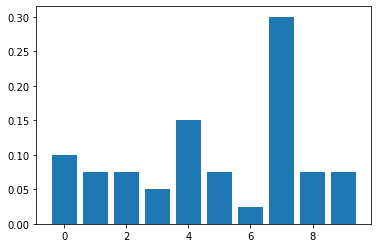

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Bayes Filter Problem
"""
Follow steps of Bayes filter.  
You can use the plot_fuction() above to help you check the belief in each step.
Please print out the final answer.
"""
belief = 0.1 * np.ones(10)
#############################################################################
#                    TODO: Implement your code here                         #
#############################################################################
u = [0,3,4]
states = np.arange(0,10,1)

z = [1,1,0]
bel_predicted = np.zeros(len(states))
belief_tmp = 0.1*np.ones(10)
#motion model: check if the difference between current state and prior state is equal to 
#input command
def motion(x,y,u): 
#     if x+u >10:
#         d = x+u - 10
#     else:
#         d = x+u
    
#     if d == y:
#         p =1
#     else:
#         p=0
    return int((x+u)%10==y)

def measurement(z,x):  #this function returns the sensor measurement: z- landmarks, x: current state
    if x in [0,3,6]:
        x = 1
    else:
        x= 0
        
    if z and x:
        return 0.8
    elif z and not x:
        return 0.4
    elif x and not z:
        return 0.2
    else:
        return 0.6
    

for i in range(len(u)):
    for current in range(len(states)): #for all kinds of states possible, here we have 10 differnet possible states
        bel_predicted[current] = 0
        for prior in range(len(states)): #every state(above loop) with every other state(this loop)
            bel_predicted[current] = bel_predicted[current] + motion(states[prior], states[current], u[i])*belief_tmp[prior] #probabilities that robot is in current state, given all the other prior states and command
          
        belief[current] = bel_predicted[current]* measurement(z[i], states[current])

        
    eta = 1/sum(belief)
    belief = np.multiply(belief, eta) 
    belief_tmp = np.copy(belief)

        


#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################
plt.bar(np.arange(0,10), belief)

print("belief state     probability")
for i in range(10):
    print("%6d %18.3f\n" % (i, belief[i]))